In [1]:
%matplotlib inline


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
data = pd.read_csv('Expanded_data_with_more_features.csv', index_col=0)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30641 entries, 0 to 960
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               30641 non-null  object 
 1   EthnicGroup          28801 non-null  object 
 2   ParentEduc           28796 non-null  object 
 3   LunchType            30641 non-null  object 
 4   TestPrep             28811 non-null  object 
 5   ParentMaritalStatus  29451 non-null  object 
 6   PracticeSport        30010 non-null  object 
 7   IsFirstChild         29737 non-null  object 
 8   NrSiblings           29069 non-null  float64
 9   TransportMeans       27507 non-null  object 
 10  WklyStudyHours       29686 non-null  object 
 11  MathScore            30641 non-null  int64  
 12  ReadingScore         30641 non-null  int64  
 13  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 3.5+ MB


In [9]:
data.tail()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93
960,male,group B,some college,standard,none,married,never,no,1.0,school_bus,5 - 10,64,60,58


In [10]:
data.head()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [11]:
data

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
816,female,group D,high school,standard,none,single,sometimes,no,2.0,school_bus,5 - 10,59,61,65
890,male,group E,high school,standard,none,single,regularly,no,1.0,private,5 - 10,58,53,51
911,female,NaN,high school,free/reduced,completed,married,sometimes,no,1.0,private,5 - 10,61,70,67
934,female,group D,associate's degree,standard,completed,married,regularly,no,3.0,school_bus,5 - 10,82,90,93


In [12]:
data.describe()

,NrSiblings,MathScore,ReadingScore,WritingScore
count,29069.000000,30641.000000,30641.000000,30641.000000
mean,2.145894,66.558402,69.377533,68.418622
std,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,10.000000,4.000000
25%,1.000000,56.000000,59.000000,58.000000
50%,2.000000,67.000000,70.000000,69.000000
75%,3.000000,78.000000,80.000000,79.000000
max,7.000000,100.000000,100.000000,100.000000


In [14]:
# Lets see what each column holds
uni_vals = data.apply(lambda x: x.unique())
cols = data.columns
for ind, itm in enumerate(uni_vals):
    print(f'col_name = {cols[ind]}, unique_val = {itm}')

col_name = Gender, unique_val = ['female' 'male']
col_name = EthnicGroup, unique_val = [nan 'group C' 'group B' 'group A' 'group D' 'group E']
col_name = ParentEduc, unique_val = ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school' nan]
col_name = LunchType, unique_val = ['standard' 'free/reduced']
col_name = TestPrep, unique_val = ['none' nan 'completed']
col_name = ParentMaritalStatus, unique_val = ['married' 'single' 'widowed' nan 'divorced']
col_name = PracticeSport, unique_val = ['regularly' 'sometimes' 'never' nan]
col_name = IsFirstChild, unique_val = ['yes' 'no' nan]
col_name = NrSiblings, unique_val = [ 3.  0.  4.  1. nan  2.  5.  7.  6.]
col_name = TransportMeans, unique_val = ['school_bus' nan 'private']
col_name = WklyStudyHours, unique_val = ['< 5' '5 - 10' '> 10' nan]
col_name = MathScore, unique_val = [ 71  69  87  45  76  73  85  41  65  37  58  40  66  80  48  88  18  46
  50  42  74  75  70  63  56  97  81  51  7

In [16]:
# Removing the NAN values
data = data.dropna()

In [17]:
data.shape

(19243, 14)

## Checking the data distribution of the categories

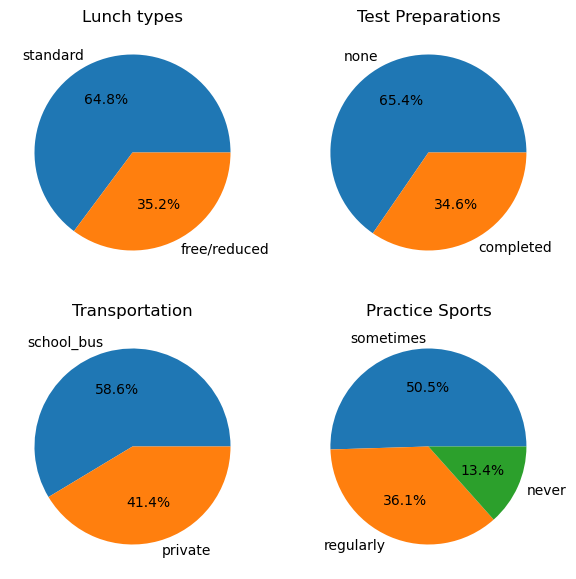

In [22]:
# LUNCH TYPES, TEST PREPARATIONS, TRANSPORTATION AND PRACTISE SPORTS
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(7, 7))

ax1.pie(data.LunchType.value_counts(), labels=data.LunchType.unique(), autopct='%.1f%%')
ax1.set_title('Lunch types')

ax2.pie(data.TestPrep.value_counts(), labels=data.TestPrep.unique(), autopct='%.1f%%')
ax2.set_title('Test Preparations')

ax3.pie(data.TransportMeans.value_counts(), labels=data.TransportMeans.unique(), autopct='%.1f%%')
ax3.set_title('Transportation')
ax4.pie(data.PracticeSport.value_counts(), labels=data.PracticeSport.unique(), autopct='%.1f%%')
ax4.set_title('Practice Sports')
plt.show()

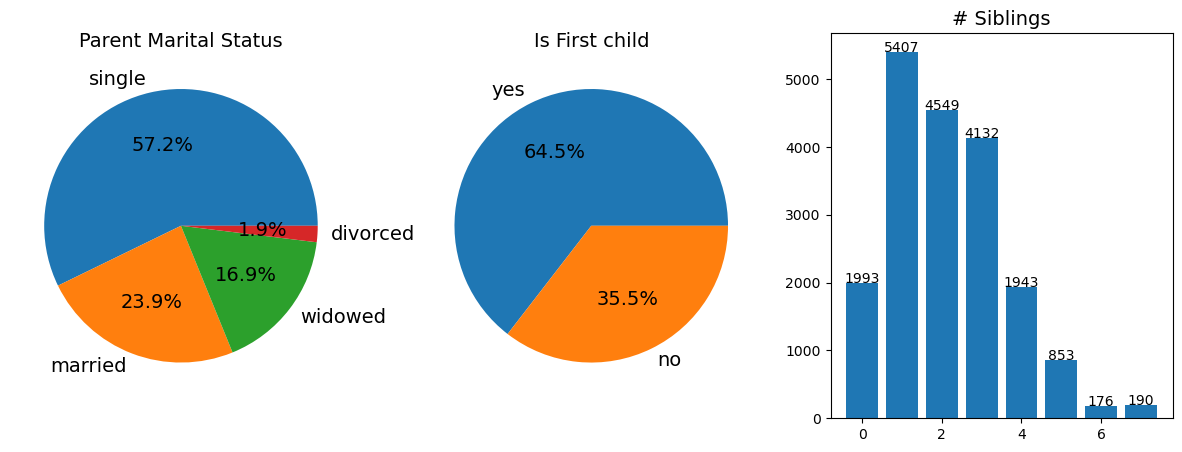

In [23]:
# PARENT MARITAL STATUS, IS FIRST CHILD AND # SIBLINGS
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))

ax[0].pie(data.ParentMaritalStatus.value_counts(), labels=data.ParentMaritalStatus.unique(),
          textprops={'fontsize': 14}, autopct='%.1f%%')
ax[0].set_title('Parent Marital Status', fontsize=14)

ax[1].pie(data.IsFirstChild.value_counts(), labels=data.IsFirstChild.unique(),
          textprops={'fontsize': 14}, autopct='%.1f%%')
ax[1].set_title('Is First child', fontsize=14)


# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')
X = data.NrSiblings.value_counts().index
Y = data.NrSiblings.value_counts().values

ax[2].bar(X, Y)
addlabels(range(8), data.NrSiblings.value_counts())
ax[2].set_title('# Siblings', fontsize=14)

plt.show()

## Comparing some of the data with the scores

In [25]:
pv1=pd.pivot_table(data,index='Gender',values=['MathScore','ReadingScore','WritingScore'])

In [26]:
pv1

,MathScore,ReadingScore,WritingScore
Gender,,,
female,64.256164,73.068338,73.070588
male,69.091994,65.885720,63.990283


[Text(0.5, 0, '73.0706'), Text(0.5, 0, '63.9903')]

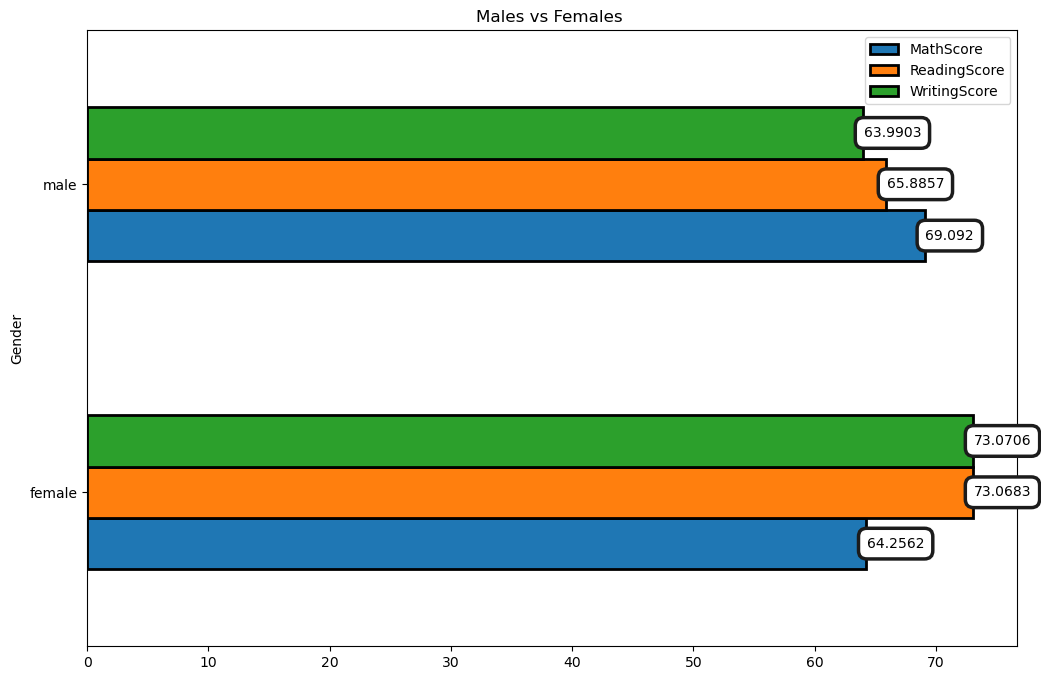

In [27]:
# HOW THE TEST SCORES COMPARE FOR MALE AND FEMALE STUDENTS
p1=pv1.plot(kind='barh',y=['MathScore','ReadingScore','WritingScore'],edgecolor='black',linewidth=2,figsize=(12,8),title='Males vs Females ')
p1.bar_label(p1.containers[0], label_type='edge',padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})
p1.bar_label(p1.containers[1], label_type='edge',padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})
p1.bar_label(p1.containers[2], label_type='edge',padding=0.5,bbox={"boxstyle": "round", "pad": 0.6, "facecolor": "white", "edgecolor": "#1c1c1c", "linewidth" : 2.5, "alpha": 1})

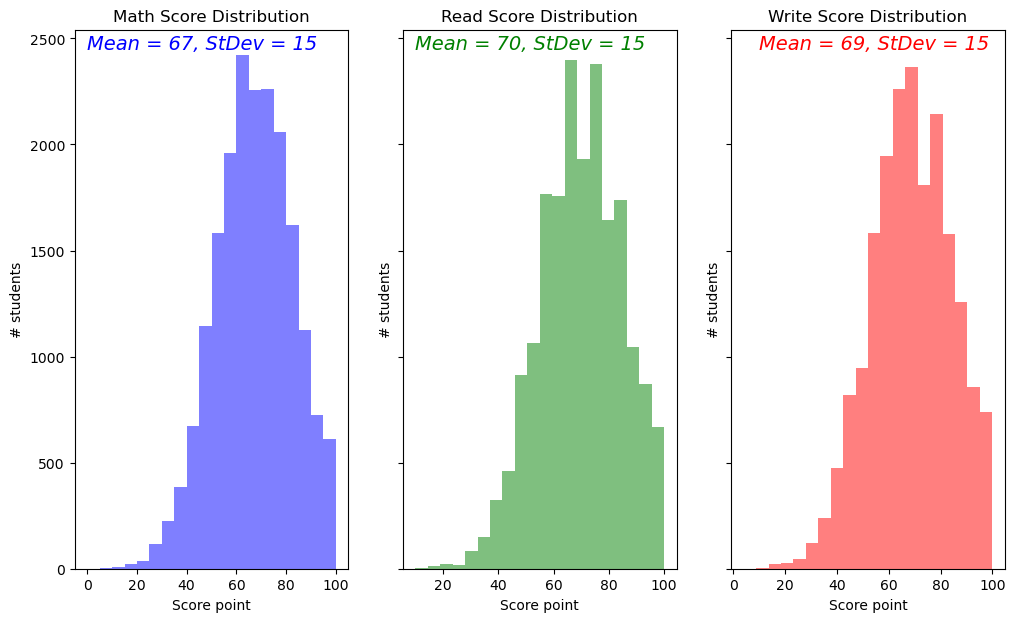

In [55]:
# DATA DISTRIBUTION OF THREE SCORES (MEAN AND STDEV)
fig, ax = plt.subplots(ncols = 3, figsize=(12, 7), sharey=True)

math_avg, math_std = data.MathScore.mean(), data.MathScore.std()
ax[0].hist(data.MathScore, bins=20, color='blue', alpha = 0.5)
ax[0].set(title='Math Score Distribution', xlabel='Score point', ylabel='# students')
ax[0].text(0, 2450, f'Mean = {round(math_avg)}, StDev = {round(math_std)}', style ='italic',
        fontsize = 14, color ="blue")

r_avg, r_std = data.ReadingScore.mean(), data.ReadingScore.std()
ax[1].hist(data.ReadingScore, bins=20, color='green', alpha = 0.5)
ax[1].set(title='Read Score Distribution', xlabel='Score point', ylabel='# students')
ax[1].text(10, 2450, f'Mean = {round(r_avg)}, StDev = {round(r_std)}', style ='italic',
        fontsize = 14, color ="green")

w_avg, w_std = data.WritingScore.mean(), data.WritingScore.std()
ax[2].hist(data.WritingScore, bins=20, color='red', alpha = 0.5)
ax[2].set(title='Write Score Distribution', xlabel='Score point', ylabel='# students')
ax[2].text(10, 2450, f'Mean = {round(w_avg)}, StDev = {round(w_std)}', style ='italic',
        fontsize = 14, color ="red")

plt.show()

In [30]:
#LETS EXAMINE HOW STUDY HOURS AFFECT THE MATH SCORE
hours_mathscore = data.groupby('WklyStudyHours').size().reset_index()

In [31]:
# Finding the count of the students
hours_mathscore = hours_mathscore.rename({0:'count_students'}, axis=1)
hours_mathscore

,WklyStudyHours,count_students
0,5 - 10,10499
1,< 5,5381
2,> 10,3363


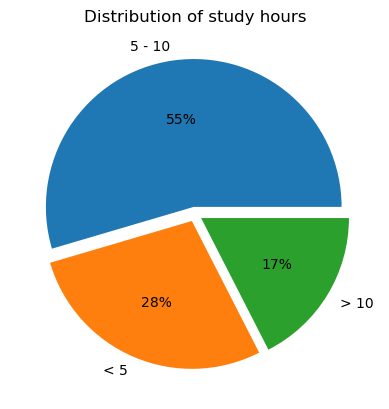

In [32]:
# Finding the distribution of Study hours
plt.pie(hours_mathscore.count_students, 
       explode=[0.05, 0.05, 0.05], labels = hours_mathscore.WklyStudyHours, autopct='%.0f%%')
plt.title('Distribution of study hours')
plt.show()

In [56]:
# The output shows mean of maths score.
# This depends with the weekly study hour.
wkly_hours_low = data[data.WklyStudyHours == '< 5'].MathScore.mean()
wkly_hours_med = data[data.WklyStudyHours == '5 - 10'].MathScore.mean()
wkly_hours_high = data[data.WklyStudyHours == '> 10'].MathScore.mean()
print(f'Highest = {wkly_hours_high}, Moderate = {wkly_hours_med}, Lowest = {wkly_hours_low}')

Highest = 68.87838239666964, Moderate = 66.95742451662063, Lowest = 64.60564950752648


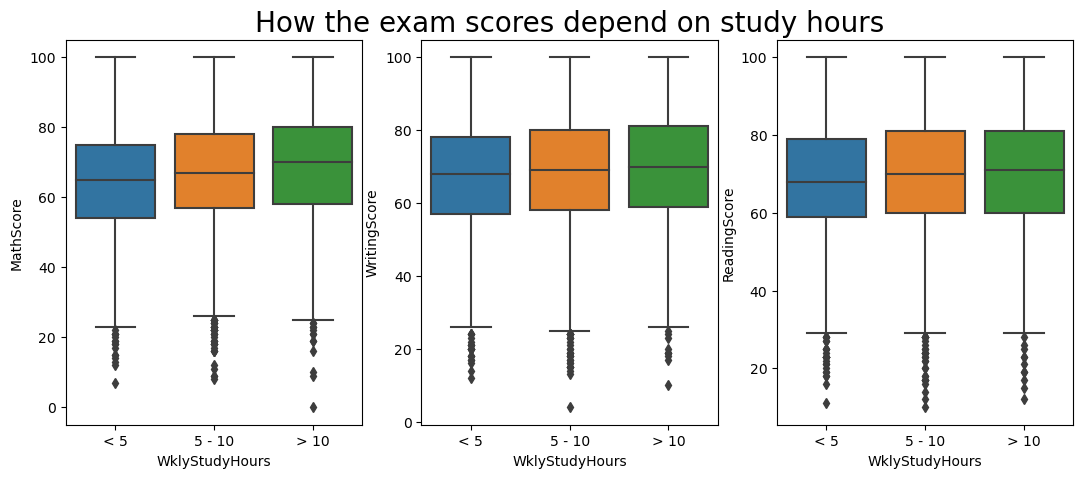

In [34]:
# How Exams Scores depend on Study Hours
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(13, 5))
sns.boxplot(data=data, x='WklyStudyHours', y='MathScore',
            orient='vertical', ax=ax1)
sns.boxplot(data=data, x='WklyStudyHours', y='WritingScore',
            orient='vertical', ax=ax2)

sns.boxplot(data=data, x='WklyStudyHours', y='ReadingScore',
            orient='vertical', ax=ax3)
ax2.set_title('How the exam scores depend on study hours', fontsize=20)       
plt.show()

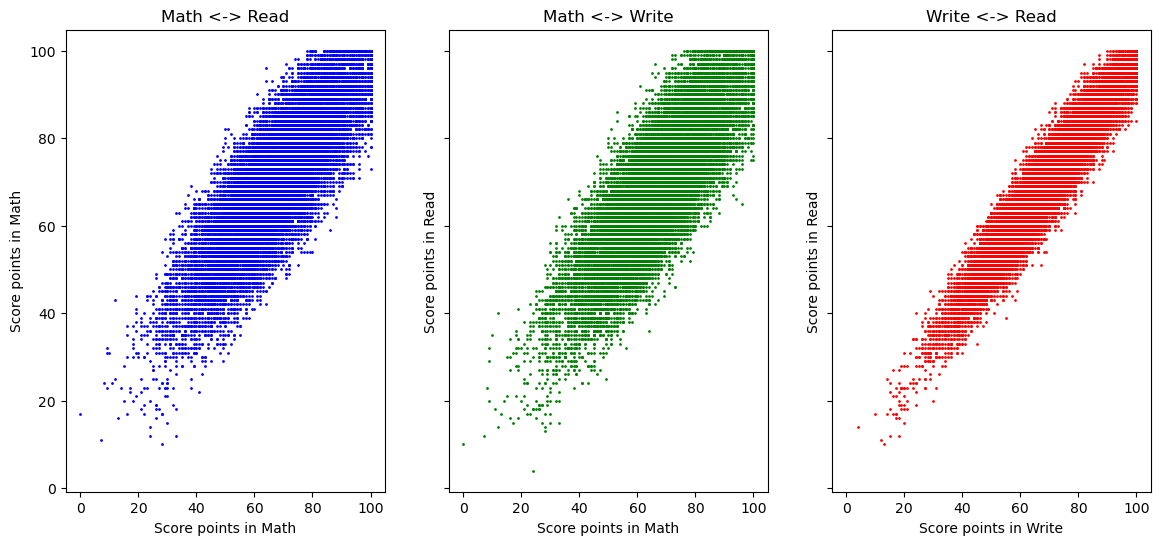

In [35]:
# Checking how the subjects depend on each other
fig, ax = plt.subplots(ncols=3, figsize=(14, 6), sharey=True, sharex=True)

ax[0].scatter(data.MathScore, data.ReadingScore, s=1, c='b')
ax[0].set_title('Math <-> Read')
ax[0].set(xlabel='Score points in Math', ylabel='Score points in Math')

ax[1].scatter(data.MathScore, data.WritingScore, s=1, c='g')
ax[1].set_title('Math <-> Write'); ax[1].set(xlabel='Score points')
ax[1].set(xlabel='Score points in Math', ylabel='Score points in Read')

ax[2].scatter(data.WritingScore, data.ReadingScore, s=1, c='r')
ax[2].set_title('Write <-> Read'); ax[2].set(xlabel='Score points')
ax[2].set(xlabel='Score points in Write', ylabel='Score points in Read')

plt.show()

## MODELLING THE ALGORITHM

In [36]:
data_modeling = data.iloc[:, -4:]
data_modeling.head()

,WklyStudyHours,MathScore,ReadingScore,WritingScore
2,< 5,87,93,91
4,5 - 10,76,78,75
5,5 - 10,73,84,79
6,5 - 10,85,93,89
7,> 10,41,43,39


In [37]:
#Extracting Independent and dependent Variable
x= data.iloc[:, [12]].values
y= data.iloc[:, [13]].values

In [39]:
y

array([[91],
       [75],
       [79],
       ...,
       [51],
       [93],
       [58]], dtype=int64)

In [40]:
# Splitting the dataset into training and test set.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.8, random_state=42)

In [41]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [42]:
x_train

array([[ 1.39539954],
       [ 0.09569317],
       [-0.45155161],
       ...,
       [-1.81966358],
       [-0.10952362],
       [-0.10952362]])

In [43]:
y_train

array([[99],
       [68],
       [59],
       ...,
       [42],
       [72],
       [72]], dtype=int64)

In [44]:
x_test

array([[ 1.39539954],
       [-2.02488037],
       [-0.51995721],
       ...,
       [-2.50371956],
       [ 1.94264433],
       [-1.54604118]])

In [45]:
y_test

array([[95],
       [44],
       [60],
       ...,
       [39],
       [98],
       [50]], dtype=int64)

In [46]:
#Fitting the Simple Linear Regression model to the training dataset
from sklearn.linear_model import LinearRegression
regressor= LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [50]:
#Prediction of Test and Training set result
y_pred= regressor.predict(x_test)
x_pred= regressor.predict(x_train)

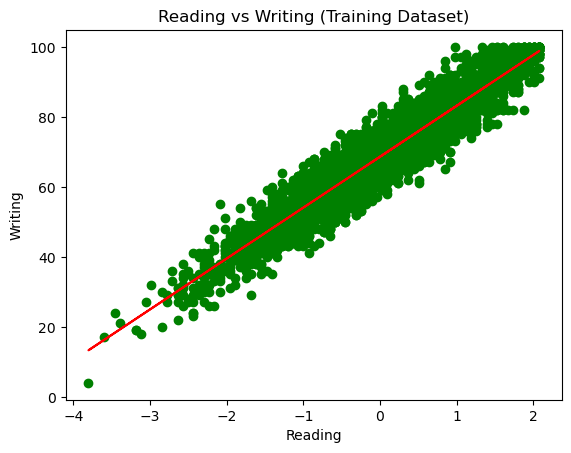

In [52]:
##Visualizing the Training set results
plt.scatter(x_train, y_train, color="green")
plt.plot(x_train, x_pred, color="red")
plt.title("Reading vs Writing (Training Dataset)")
plt.xlabel("Reading")
plt.ylabel("Writing")
plt.show()

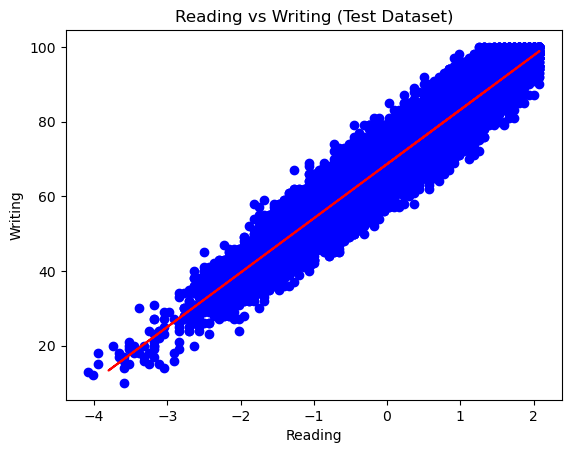

In [53]:
##Visualizing the Test set results
#visualizing the Test set results
plt.scatter(x_test, y_test, color="blue")
plt.plot(x_train, x_pred, color="red")
plt.title("Reading vs Writing (Test Dataset)")g
plt.xlabel("Reading")
plt.ylabel("Writing")
plt.show()

In [54]:
import sklearn.metrics as sm
# Compute performance metrics
print("Linear regressor performance:")
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

Linear regressor performance:
R2 score = 0.91
